In [2]:

pip install tensorflow


     |████████████████████████████████| 479.6 MB 78 kB/s  eta 0:00:012   |████▏                           | 62.4 MB 487 kB/s eta 0:14:17     |█████████████████▍              | 259.8 MB 16.0 MB/s eta 0:00:14�█████████           | 316.0 MB 8.4 MB/s eta 0:00:20     |████████████████████████▍       | 365.2 MB 5.5 MB/s eta 0:00:21    |█████████████████████████████▊  | 445.3 MB 6.3 MB/s eta 0:00:06
     |████████████████████████████████| 5.3 MB 2.6 MB/s eta 0:00:01
     |████████████████████████████████| 294 kB 7.2 MB/s eta 0:00:01
     |████████████████████████████████| 2.4 MB 3.7 MB/s eta 0:00:01
     |████████████████████████████████| 71 kB 777 kB/s eta 0:00:01
     |████████████████████████████████| 85 kB 2.1 MB/s eta 0:00:01
     |████████████████████████████████| 440 kB 2.6 MB/s eta 0:00:01
     |████████████████████████████████| 24.5 MB 3.0 MB/s eta 0:00:01
     |████████████████████████████████| 6.0 MB 2.7 MB/s eta 0:00:01
     |████████████████████████████████| 5.6 MB 2.6 MB/s eta 0

In [4]:
import warnings
warnings.filterwarnings('ignore')


In [12]:
import tensorflow as tf
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

In [13]:
# Load housing dataset
california = fetch_california_housing()
X = california.data
y = california.target

In [14]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [16]:
# Build the Deep Neural Network model
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)  # Linear output for regression
])

2025-05-05 19:35:25.426836: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:268] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


In [17]:
# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [18]:
# Train the model
history = model.fit(X_train_scaled, y_train, validation_split=0.1, epochs=100, batch_size=32, verbose=1)

Epoch 1/100
465/465 [==============================] - 1s 2ms/step - loss: 1.0091 - mae: 0.6179 - val_loss: 0.4550 - val_mae: 0.4752
Epoch 2/100
465/465 [==============================] - 1s 2ms/step - loss: 0.3986 - mae: 0.4490 - val_loss: 0.4135 - val_mae: 0.4513
Epoch 3/100
465/465 [==============================] - 1s 1ms/step - loss: 0.3670 - mae: 0.4303 - val_loss: 0.3975 - val_mae: 0.4563
Epoch 4/100
465/465 [==============================] - 1s 2ms/step - loss: 0.3506 - mae: 0.4197 - val_loss: 0.3765 - val_mae: 0.4362
Epoch 5/100
465/465 [==============================] - 1s 2ms/step - loss: 0.3501 - mae: 0.4128 - val_loss: 0.3666 - val_mae: 0.4312
Epoch 6/100
465/465 [==============================] - 1s 2ms/step - loss: 0.3271 - mae: 0.4021 - val_loss: 0.3558 - val_mae: 0.4161
Epoch 7/100
465/465 [==============================] - 1s 2ms/step - loss: 0.3227 - mae: 0.3949 - val_loss: 0.3538 - val_mae: 0.4121
Epoch 8/100
465/465 [==============================] - 1s 2ms/step - 

In [19]:
# Evaluate the model
loss, mae = model.evaluate(X_test_scaled, y_test)
print(f"\nMean Absolute Error on Test Data: {mae:.2f}")

129/129 [==============================] - 0s 2ms/step - loss: 0.2707 - mae: 0.3512

Mean Absolute Error on Test Data: 0.35


In [20]:
# Make predictions
y_pred = model.predict(X_test_scaled)

129/129 [==============================] - 0s 1ms/step


In [21]:
# Metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")


Mean Squared Error: 0.27
R^2 Score: 0.79


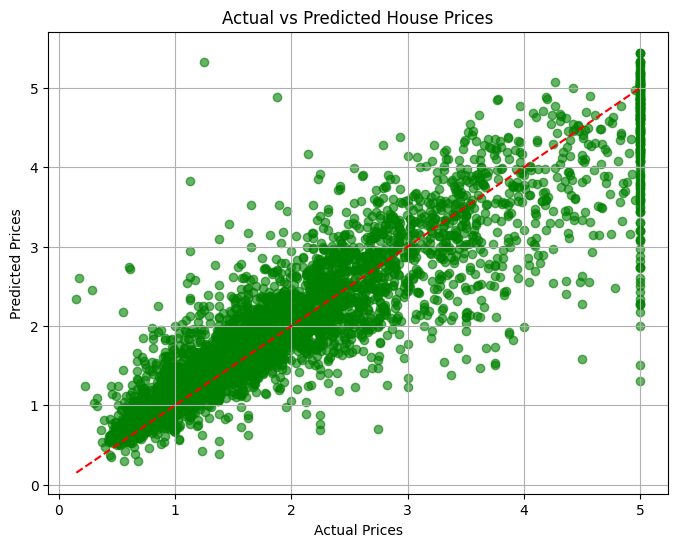

In [23]:
# Plot actual vs predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='green', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted House Prices')
plt.grid(True)
plt.show()